In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset into a pandas DataFrame
df=pd.read_csv("/content/drive/MyDrive/nmims/sem1/aiml/kshamta mam/10 08 24/placement.csv")

Basic Data Exploration

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


preprocessing

In [ ]:
#locating the 1st column
df1=df.iloc[:,1:]

In [ ]:
df1.tail()

,cgpa,iq,placement
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1
99,6.2,113.0,1


eda


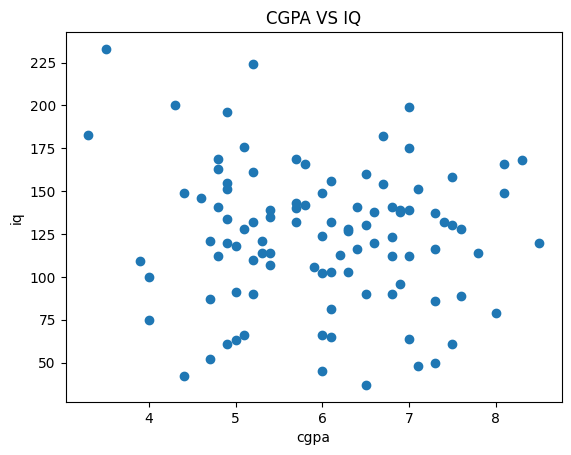

In [ ]:
plt.scatter(df1["cgpa"],df1["iq"])
plt.title("CGPA VS IQ")
plt.xlabel("cgpa")
plt.ylabel("iq")
plt.show()

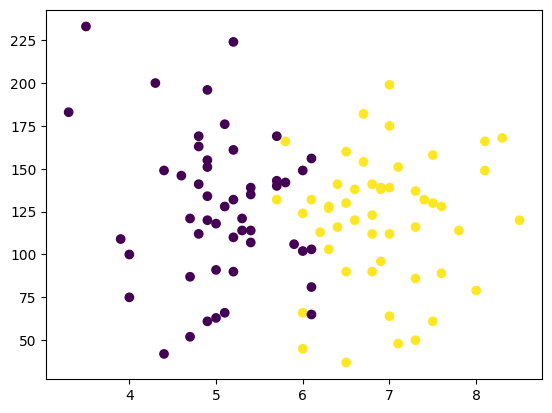

In [ ]:
plt.scatter(df1["cgpa"],df1["iq"],c=df1["placement"])

**16/08/24** Preparing Data for Modeling

In [ ]:
#step1: extract ip and op

X=df1.iloc[:,0:2] #want 0 and 1 column, 2 is  not included
y=df1.iloc[:,-1]

In [ ]:
print(X)

    cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns]


In [ ]:
print(y)

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64


In [ ]:
#step3: splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=1)

In [ ]:
X_train

,cgpa,iq
92,5.2,110.0
39,4.6,146.0
56,6.1,65.0
52,7.0,175.0
51,4.8,141.0
...,...,...
75,4.8,169.0
9,5.1,66.0
72,7.3,116.0
12,5.4,139.0


In [ ]:
X_test

,cgpa,iq
80,4.9,196.0
84,5.7,169.0
33,6.0,149.0
81,5.4,107.0
93,6.8,112.0
17,3.3,183.0
36,5.7,140.0
82,6.5,37.0
69,8.5,120.0
65,8.1,166.0


In [ ]:
y_train

,placement
92,0
39,0
56,0
52,1
51,0
...,...
75,0
9,0
72,1
12,0


In [ ]:
y_test

,placement
80,0
84,0
33,0
81,0
93,1
17,0
36,0
82,1
69,1
65,1


In [ ]:
#step2: scaling
#doing it after step3 so that we can understand and visualize the data pehle hi
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-0.70920814, -0.30811838],
       [-1.25475287,  0.61709344],
       [ 0.10910895, -1.46463316],
       [ 0.92742603,  1.36240297],
       [-1.07290463,  0.4885918 ],
       [ 0.92742603,  0.43719114],
       [-1.89122172, -0.33381871],
       [ 1.38204664, -1.56743448],
       [ 0.10910895, -1.05342791],
       [ 0.01818482, -1.97863973],
       [-0.61828402, -0.02541477],
       [-0.98198051, -1.56743448],
       [ 0.65465367,  1.54230527],
       [ 0.01818482, -0.51372101],
       [-0.70920814,  0.25728884],
       [ 0.74557779, -0.82212495],
       [-1.16382875, -1.79873743],
       [ 0.01818482,  0.05168622],
       [-0.61828402, -0.20531707],
       [ 0.47280543,  0.97689804],
       [-0.89105639, -0.10251575],
       [ 0.20003307, -0.2310174 ],
       [ 0.38188131,  0.4885918 ],
       [-1.52752523,  2.00491118],
       [-1.43660111,  0.69419443],
       [-0.98198051,  0.3086895 ],
       [ 0.56372955,  0.41149081],
       [-1.07290463, -0.25671773],
       [-1.16382875,

In [ ]:
X_test=sc.transform(X_test)
X_test

#we dont do y_train,y_test here scaling since already 0 to 1 range mai hai

array([[-0.98198051,  1.90210986],
       [-0.25458754,  1.208201  ],
       [ 0.01818482,  0.69419443],
       [-0.5273599 , -0.38521937],
       [ 0.74557779, -0.25671773],
       [-2.43676644,  1.5680056 ],
       [-0.25458754,  0.46289147],
       [ 0.47280543, -2.18424236],
       [ 2.29128785, -0.0511151 ],
       [ 1.92759136,  1.13110001]])

In [ ]:
#step4: training
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:

y_pred=lr.predict(X_test)

In [ ]:
y_test

,placement
80,0
84,0
33,0
81,0
93,1
17,0
36,0
82,1
69,1
65,1


In [ ]:
#step5: evaluate
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

<Axes: >

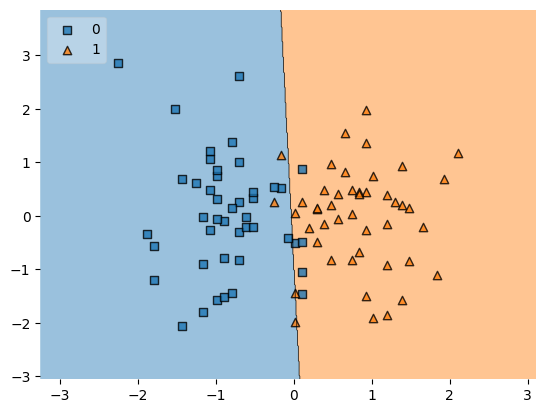

In [ ]:
#visualization to understand

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train.values,clf=lr,legend=2)

In [ ]:
#step6: deploy
import pickle
pickle.dump(lr,open('/content/drive/MyDrive/nmims/sem1/aiml/kshamta mam/10 08 24/model.pkl','wb'))


